# Домашнее задание «Проблема качества данных»

## Задание

**Цель:** применить на практике методы по оценке качества данных.

**Описание задания:**  
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

**Этапы работы:**

1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.  
    a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.  
    b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.  
6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.
    a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. *Попробуйте математически преобразовать признак Age.
10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
11. Сформулируйте выводы по проделанной работе.
    a) Кратко опишите какие преобразования были сделаны и почему.
    b) Сравните метрики моделей из п. 2 и п. 10.
    c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

**Результат:** применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

**Форма выполнения:**
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.

**Инструменты:**
- Jupyter Notebook/Google Colab;
- GitHub;
- датасет.

**Рекомендации к выполнению:**
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [2]:
import pandas as pd
import numpy as np

In [6]:
# Получите и загрузите данные.

data = pd.read_csv('train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [7]:
#Удалите все пропущенные значения и категориальные переменные.

data = data[ pd.isnull( data['Age'] ) == 0 ]
data = data[ pd.isnull( data['Cabin'] ) == 0 ]
data = data[ pd.isnull( data['Embarked'] ) == 0 ]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [8]:
y = data['Survived']
y.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [20]:
X = data.drop(columns=['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked' ])
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
1,2,1,38.0,1,0,71.2833
3,4,1,35.0,1,0,53.1000
6,7,1,54.0,0,0,51.8625
10,11,3,4.0,1,1,16.7000
11,12,1,58.0,0,0,26.5500


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

In [27]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
# Для оценки будем применять стандартную метрику accuracy так как нет сильного дисбаланса в классе "Survived"

model.score(X_train, y_train)

0.7191780821917808

In [30]:
model.score(X_test, y_test)

0.7027027027027027

### 3. Снова загрузите полные данные.

In [217]:
data = pd.read_csv('train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [218]:
# Удаляем признаки 'PassengerId', 'Name', 'Ticket' так как они не несут никакой полезной информации для нашей модели

data = data.drop(columns=['PassengerId', 'Name', 'Ticket'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### 5. Проверьте данные на наличие пропущенных значений.
    a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


В прошлом датасете где мы удалили вообще все строки с пропусками осталось 183 строки. То есть:

In [220]:
answer = 1 - (183 / 891)
print('При удалении всех строк с пропусками теряем {0:.0%} данных'.format(answer))

При удалении всех строк с пропусками теряем 79% данных


    b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [221]:
# Смотрим как заполненц столбец Age
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [222]:
# Заполним пропуски значением медианы
data['Age'] = data['Age'].fillna(28)


In [223]:
# Видим, что это не так сильно повлияло на статистику
data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [224]:
# Столбец Cabin

# Если посмотреть несколько значений в связке с Fare, то кажется будто более высокий Fare подразумевает наличие кабины
data[['Cabin','Fare']].head()

,Cabin,Fare
0,NaN,7.2500
1,C85,71.2833
2,NaN,7.9250
3,C123,53.1000
4,NaN,8.0500


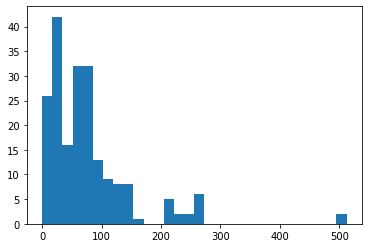

In [225]:
# Посмотрим на распределение признака Cabin в разрезе Fare и видим, что более высокий Fare не означает наличие кабины

import matplotlib.pyplot as plt

cabin_fare = data[['Cabin','Fare']][pd.isnull( data['Cabin'] ) == 0 ]

plt.hist(cabin_fare['Fare'], bins=30)
plt.show()

In [226]:
# В таком случае попробуем заполнить пропуски константой 'No cabin'
data['Cabin'] = data['Cabin'].fillna('No cabin')
data['Cabin'].value_counts()

No cabin       687
G6               4
C23 C25 C27      4
B96 B98          4
F33              3
              ... 
B4               1
C49              1
C118             1
D45              1
C85              1
Name: Cabin, Length: 148, dtype: int64

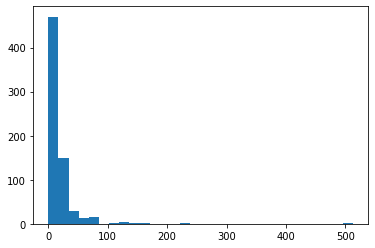

In [227]:
cabin_fare = data[['Cabin','Fare']][data['Cabin']  == 'No cabin' ]

plt.hist(cabin_fare['Fare'], bins=30)
plt.show()

In [228]:
cabin_pclass = data[['Cabin','Pclass']][data['Cabin']  == 'No cabin' ]

cabin_pclass.head()


,Cabin,Pclass
0,No cabin,3
2,No cabin,3
4,No cabin,3
5,No cabin,3
7,No cabin,3


In [229]:
# Поле Embarked заполним модой
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [230]:
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### 6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [231]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No cabin,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,No cabin,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,No cabin,S


In [232]:
# Используем LabelEncoder для Sex

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Sex'] = encoder.fit_transform(data['Sex'])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,No cabin,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,No cabin,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,No cabin,S


In [233]:
# Признак Cabin переведем в бинарное значние по принципу "есть кабина / нет кабины" и применим LabelEncoder

data["Cabin"] = np.where(data["Cabin"] == "No cabin", 0, 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,S
1,1,1,0,38.0,1,0,71.2833,1,C
2,1,3,0,26.0,0,0,7.9250,0,S
3,1,1,0,35.0,1,0,53.1000,1,S
4,0,3,1,35.0,0,0,8.0500,0,S


In [234]:
# Признак Embarked обозначает разные порты где была посадка пассажиров и поэтому применим к нему get_dummies

data = pd.get_dummies(data, columns=['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,0,1


### 7. Проверьте данные на наличие выбросов. a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

У признаков 'SibSp', 'Parch', 'Fare' есть значения которые сильно выбиваются и предлагаю их удалить

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

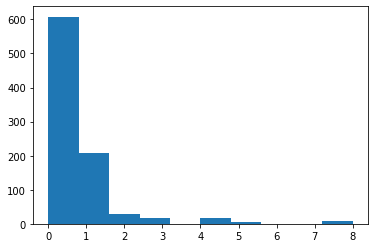

In [235]:
plt.hist(data['SibSp'])

(array([608.,   0., 209.,   0.,  28.,   0.,  16.,   0.,  18.,   5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

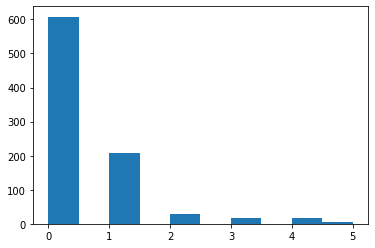

In [236]:
data = data[(data['SibSp'] < 6)] 

plt.hist(data['SibSp'])

(array([678., 118.,   0.,  73.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

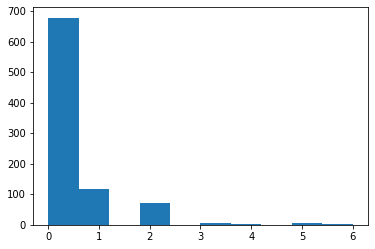

In [237]:
plt.hist(data['Parch'])

(array([678.,   0.,   0., 118.,   0.,   0.,  73.,   0.,   0.,   5.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

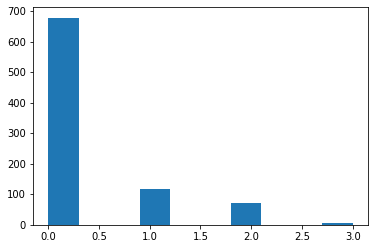

In [238]:
data = data[(data['Parch'] < 4)] 

plt.hist(data['Parch'])

(array([723.,  99.,  31.,   2.,  11.,   5.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

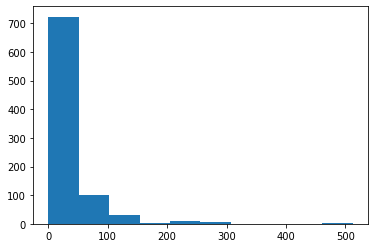

In [239]:
plt.hist(data['Fare'])

(array([605., 131.,  56.,  30.,  15.,  16.,   2.,   0.,   9.,   7.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <a list of 10 Patch objects>)

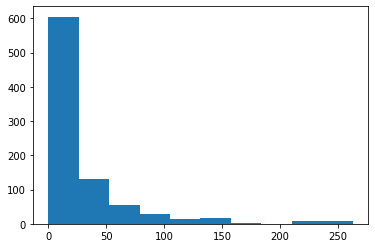

In [240]:
data = data[(data['Fare'] <= 300)]
plt.hist(data['Fare'])

### 9. *Попробуйте математически преобразовать признак Age.

(array([ 54.,  46., 177., 338., 110.,  67.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

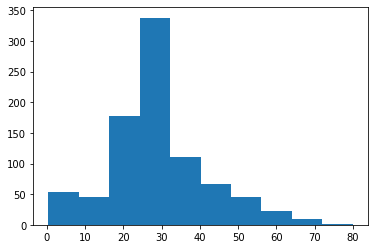

In [241]:
plt.hist(data['Age'])

In [244]:
# Возьмем промежутки по 10 лет и будем использовать их как возрастные категории
bins = [0, 10, 20, 30, 40, 50, 60, np.inf]
names = [1, 2, 3, 4, 5, 6, 7]

# Создадим новую категорию 
data['Age_category'] = pd.cut(data['Age'], bins, labels=names)

# Age_category переведем в числовой формат 
data['Age_category'] = pd.to_numeric(data['Age_category'])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Age_category
0,0,3,1,22.0,1,0,7.2500,0,0,0,1,3
1,1,1,0,38.0,1,0,71.2833,1,1,0,0,4
2,1,3,0,26.0,0,0,7.9250,0,0,0,1,3
3,1,1,0,35.0,1,0,53.1000,1,0,0,1,4
4,0,3,1,35.0,0,0,8.0500,0,0,0,1,4


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      871 non-null    int64  
 1   Pclass        871 non-null    int64  
 2   Sex           871 non-null    int64  
 3   Age           871 non-null    float64
 4   SibSp         871 non-null    int64  
 5   Parch         871 non-null    int64  
 6   Fare          871 non-null    float64
 7   Cabin         871 non-null    int64  
 8   Embarked_C    871 non-null    uint8  
 9   Embarked_Q    871 non-null    uint8  
 10  Embarked_S    871 non-null    uint8  
 11  Age_category  871 non-null    int64  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 70.6 KB


### 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [246]:
y = data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [248]:
X = data.drop(columns=['Survived', 'Age'])
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Age_category
0,3,1,1,0,7.2500,0,0,0,1,3
1,1,0,1,0,71.2833,1,1,0,0,4
2,3,0,0,0,7.9250,0,0,0,1,3
3,1,0,1,0,53.1000,1,0,0,1,4
4,3,1,0,0,8.0500,0,0,0,1,4


In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [250]:
model = LogisticRegression(max_iter=1000)


In [251]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [252]:
model.score(X_train, y_train)


0.8089080459770115

In [253]:
model.score(X_test, y_test)

0.7714285714285715

### 11. Сформулируйте выводы по проделанной работе. 
    a) Кратко опишите какие преобразования были сделаны и почему.


1) Были удалены признаки, которые не несут полезной информации для модели, а именно **'PassengerId', 'Name', 'Ticket'**

2) Была произведена работа над пропусками. В частности заполнили пустые строки в **Age, Cabin и Embarked**, соблюдая индивидуальную логику заполнения

3) Признаку **Age** также был присвен новый категориальный признак **Age_category** в разбивке 10 лет

4) Категориальные переменные **Sex** и **Cabin** были преобразованы через **LabelEncoder**, а **Embarked** - через **get_dummies**

Все преоброазования делались с целью повышения качества модели 

    b) Сравните метрики моделей из п. 2 и п. 10. 

Первоначально метрика Accuracy на тестовых данных до преобразования была 0.703, а на преобразованных данных получили 0.771

In [259]:
res = (0.771 / 0.703 ) - 1

print('Качество модели улучшилось на {0:.2%} по сравнению с необработанными данными'.format(res)) 

Качество модели улучшилось на 9.67% по сравнению с необработанными данными


    c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. 
    *Нужно ли аналогичным образом исследовать и дополнять действительно большие данные?

Как показали результаты модели до и после, преобразование данных действительно позитивно влияет на результат метрики. 

Думаю этот принцип также применим к работе с большими данными. Ведь если в данных много шума / ошибок то это негативно повлияет на качество модели даже если данных очень много, но преобразование и изучение большого датасета потрубет больших трудозатрат